## 1.Packages

### 1.1.Install

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy>=1.13.3 in c:\users\behzad\anaconda3\lib\site-packages (from pandas) (1.18.5)



In [3]:
pip install pyreadstat

Note: you may need to restart the kernel to use updated packages.


In [4]:
#pip install sklearn.model_selection

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


### 1.2.Import

In [7]:
import numpy as np
import pandas as pd
import pyreadstat
from sklearn.model_selection import KFold, ShuffleSplit, StratifiedKFold, StratifiedShuffleSplit, LeaveOneOut, train_test_split
import seaborn as sns
from scipy import stats

## 2.Data

### 2.1.Load Data

In [8]:
# read data
df = pd.DataFrame(pd.read_spss("../data/secom_mod.sav"))
df = df.set_index('ID')
df.shape

(1567, 592)

### 2.2.Change "class" feature Type and Values

In [9]:
df.dtypes

class         float64
timestamp      object
feature001    float64
feature002    float64
feature003    float64
               ...   
feature586    float64
feature587    float64
feature588    float64
feature589    float64
feature590    float64
Length: 592, dtype: object

In [10]:
dict_temp = {0:True ,1:False}
df['class'] = df['class'].map(dict_temp)

In [11]:
df.dtypes

class            bool
timestamp      object
feature001    float64
feature002    float64
feature003    float64
               ...   
feature586    float64
feature587    float64
feature588    float64
feature589    float64
feature590    float64
Length: 592, dtype: object

### 2.3.Splitting Traninig and Test Data 

In [12]:
print(len(df[df['class']==1]))
print(len(df[df['class']==0]))

1472
95


In [13]:
print(round(len(df[df['class']==0])/len(df),3))

0.061


In [14]:
train_df,test_df = train_test_split(df,test_size=0.2,random_state=40)

In [15]:
print(round(len(train_df[train_df['class']==0])/len(train_df),3))

0.061


In [16]:
print(round(len(test_df[test_df['class']==0])/len(test_df),3))

0.061


## 3.Feature Removal

### 3.1.Constant

In [17]:
train_df.shape

(1253, 592)

In [18]:
len(train_df[train_df.columns[train_df.nunique() == 1]].columns)

116

In [19]:
train_df.drop(list(train_df[train_df.columns[train_df.nunique() == 1]].columns), axis = 1, inplace = True)

C:\Users\Behzad\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
train_df.shape

(1253, 476)

### 3.2.least volatile

In [21]:
summary = train_df.iloc[:,2:476].describe(include='all')
summary

,feature001,feature002,feature003,feature004,feature005,feature007,feature008,feature009,feature010,feature011,...,feature581,feature582,feature583,feature584,feature585,feature586,feature587,feature588,feature589,feature590
count,1247.000000,1246.000000,1243.000000,1243.000000,1243.000000,1243.000000,1246.000000,1252.000000,1252.000000,1252.000000,...,507.000000,507.000000,1252.000000,1252.000000,1252.000000,1252.000000,1253.000000,1253.000000,1253.000000,1253.000000
mean,3013.368123,2499.426830,2200.062971,1402.845964,4.024852,101.086420,0.122002,1.464408,-0.000868,0.000099,...,0.005433,97.018185,0.500087,0.015454,0.003870,3.096511,0.021616,0.016665,0.005338,99.853302
std,73.744963,78.512899,29.332909,455.031530,54.567029,6.459451,0.007983,0.074756,0.015043,0.009357,...,0.003144,87.512914,0.003422,0.019026,0.004129,3.965856,0.012287,0.008988,0.002917,94.445004
min,2743.240000,2158.750000,2060.660000,711.025800,0.681500,82.131100,0.000000,1.191000,-0.053400,-0.034900,...,0.001000,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000
25%,2965.055000,2457.435000,2181.044400,1080.498500,1.016850,97.840000,0.121100,1.411150,-0.010625,-0.005625,...,0.003400,45.833000,0.497900,0.011600,0.003100,2.322625,0.013700,0.010600,0.003400,44.298800
50%,3010.830000,2501.755000,2201.066700,1287.353800,1.317400,101.566700,0.122400,1.463750,-0.001400,0.000400,...,0.004700,72.646900,0.500200,0.013800,0.003600,2.761900,0.020800,0.014900,0.004600,72.646900
75%,3056.615000,2540.317500,2217.866700,1593.122000,1.529600,104.672800,0.123900,1.519075,0.008400,0.006025,...,0.006500,115.103000,0.502300,0.016425,0.004100,3.292175,0.027700,0.020500,0.006400,114.749700
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,129.252200,0.128600,1.656400,0.074900,0.053000,...,0.028600,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


In [22]:
feature_std = pd.DataFrame(summary.loc['std',:])
feature_coeffstd = pd.DataFrame(summary.loc['mean',:]/summary.loc['std',:])

In [23]:
print(min(feature_std.iloc[:,0]))
print(max(feature_std.iloc[:,0]))

0.00010211126285302449
6446.6240579831865


In [24]:
print(min(feature_coeffstd.iloc[:,0]))
print(max(feature_coeffstd.iloc[:,0]))

-8.766801473755732
448.06764499280007


In [28]:
stats.shapiro(feature_std.iloc[:,0])

ShapiroResult(statistic=0.15290206670761108, pvalue=1.7788082706139228e-41)

In [29]:
stats.shapiro(feature_coeffstd.iloc[:,0])

ShapiroResult(statistic=0.3384281396865845, pvalue=4.4987826799891157e-38)

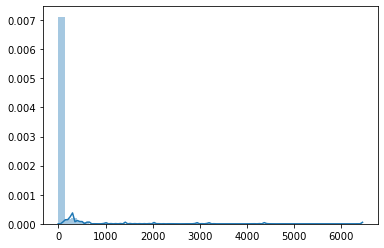

In [31]:
sns.distplot(feature_std)

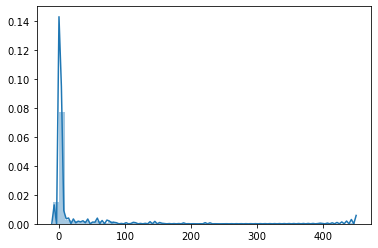

In [32]:
sns.distplot(feature_coeffstd)